## Rejection sampling

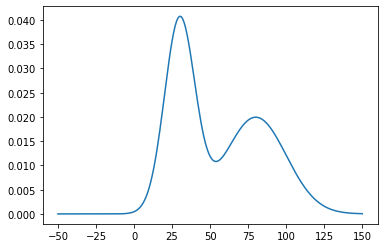

In [10]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

def P(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)

X = np.arange(-50, 151)

plt.plot(X, P(X))

La función objetivo es $P(x) = N(30,10) + N(80, 20)$, y proponemos como envolvente $Q(x) = N(50, 30)$. Otra gaussiana nos permite rechazar menos términos.

In [2]:
def Q(x):
    return st.norm.pdf(x, loc=50, scale=30)

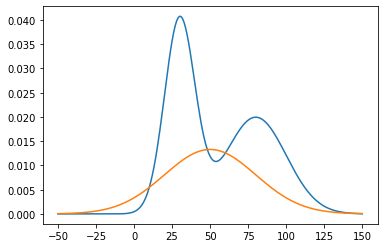

In [3]:
plt.plot(X, P(X))
plt.plot(X, Q(X))

La curva no se ajusta correctamente, pero podría corregirse multiplicándola por un factor. Proponemos como factor $k = max\left(\frac{P(x)}{Q(x)}\right)$

In [4]:
k = np.max(P(X)/Q(X))

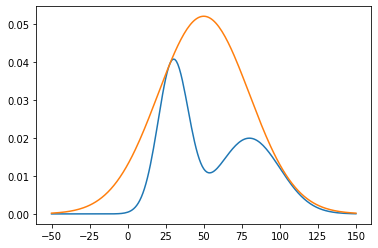

In [5]:
plt.plot(X, P(X))
plt.plot(X, k*Q(X))

In [16]:
def reject_sampling(N):
    accepted_samples = []
    
    for i in range(N):
        # Variable aleatoria con distribución Q(x)
        z = np.random.normal(50, 10)
        # Variable aleatoria con distribución uniforme
        u = np.random.uniform(0, k*Q(z))
        
        if u<=P(z):
            accepted_samples.append(z)
            
    print(f"Aceptadas: {len(accepted_samples)/N}")
    
    return np.array(accepted_samples)

In [18]:
a = reject_sampling(1000)

Aceptadas: 0.354


### Ejercicio

Queremos muestrear la función $f(x) = 1.2 - x^4$

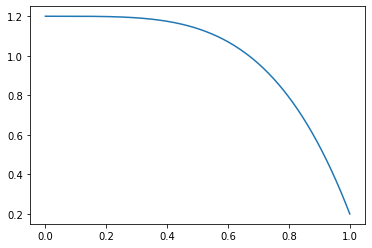

In [21]:
def f(x):
    return 1.2 - x**4

X = np.linspace(0,1,1000)

plt.plot(X, f(X))

En este caso propongamos una función exponencial $Q(x) = -e^{x-1}+1$. Y calculamos un factor de escala

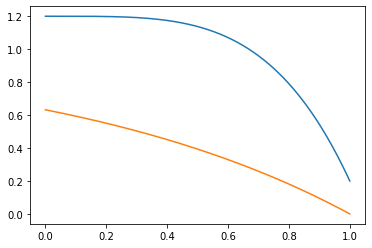

In [23]:
def Q(x):
    return -np.exp(x-1)+1

plt.plot(X, f(X))
plt.plot(X, Q(X))

<ipython-input-24-3a5c03af7503>:1: RuntimeWarning: divide by zero encountered in true_divide
  k = np.max(P(X)/Q(X))
<ipython-input-24-3a5c03af7503>:4: RuntimeWarning: invalid value encountered in multiply
  plt.plot(X, k*Q(X))


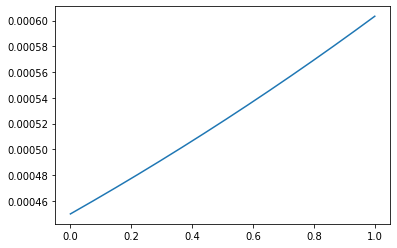

In [24]:
k = np.max(P(X)/Q(X))

plt.plot(X, P(X))
plt.plot(X, k*Q(X))

### Ejercicio

Muestreo para distribución doble gamma

In [26]:
def P(x):
    return st.dgamma.pdf(x,1)

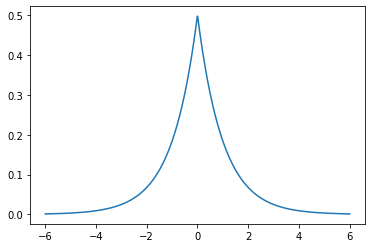

In [35]:
X = np.linspace(-6,6,1000)
plt.plot(X, P(X))

Podemos proponer una distribución normal con media 0 y alguna desviación:

In [48]:
def Q(x):
    return st.norm.pdf(x, loc=0, scale=2)

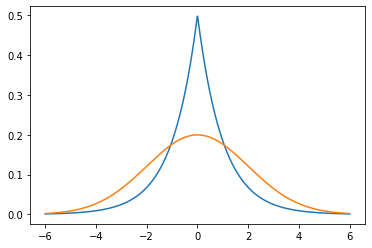

In [49]:
plt.plot(X, P(X))
plt.plot(X, Q(X))

In [51]:
k = np.max(P(X)/Q(X))

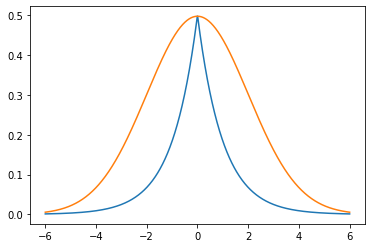

In [52]:
plt.plot(X, P(X))
plt.plot(X, k*Q(X))

In [53]:
def reject_sampling(N):
    accepted_samples = []
    
    for i in range(N):
        # Variable aleatoria con distribución Q(x)
        z = np.random.normal(50, 10)
        # Variable aleatoria con distribución uniforme
        u = np.random.uniform(0, k*Q(z))
        
        if u<=P(z):
            accepted_samples.append(z)
            
    print(f"Aceptadas: {len(accepted_samples)/N}")
    
    return np.array(accepted_samples)

In [54]:
s = reject_sampling(10000)

Aceptadas: 1.0


In [55]:
s.mean()

50.071746893495934

## Integración Montecarlo

Iniciemos con un ejemplo. Integremos $sin(x)$.

In [1]:
import random

def int_sin(N):
    a, b = 0, np.pi
    
    X = np.random.uniform(a, b, N)
    fX = np.sin(X)
    
    return (b-a)/N*np.sum(fX)
        

In [146]:
int_sin(1000000)

1.9999813470837928

In [148]:
def int_montecarlo(f, a, b, N):
    X = np.random.uniform(a, b, N)
    fX = f(X)
    
    return (b-a)/N * np.sum(fX)

In [149]:
f = lambda x: x**2

In [150]:
int_montecarlo(f, 0, 1, 10000)

0.33647933773021516

### Integración de varias variables

Resolvamos la integral $\int_0^1 \int_4^6 cos(x^4) + 3y^2 dx dy$

In [18]:
import random
import numpy as np
import scipy.stats as st

f = lambda x,y: np.cos(x**4) + 3*y**2

def int_multi(N):
    a, b = 4, 6
    c, d = 0, 1
    
    X = np.random.uniform(a, b, N)
    Y = np.random.uniform(c, d, N)
    fXY = f(X,Y)
    
    return (b-a)*(d-c)/N*np.sum(fXY)

In [5]:
int_multi(1000000)

2.0069597208170347

Hallemos el volumen de un toroide dado por la ecuación $x^2 + (\sqrt{y^2+z^2}-5)^2 <4$, con $-2<x<2, -7<y<7, -7<z<7$

In [12]:
def func(x, y, z):
    return x**2 + (np.sqrt(y**2 + z**2)-5)**2

def vol_toroide(N):
    a,b = -2, 2
    c,d = -7, 7
    e,f = -7, 7
    
    X = np.random.uniform(a, b, N)
    Y = np.random.uniform(c, d, N)
    Z = np.random.uniform(e, f, N)
    fXYZ = func(X,Y,Z)
    
    media = 0
    
    for i in range(N):
        if func(X[i], Y[i], Z[i])<4:
            media += 1
    
    return (f-e)*(b-a)*(d-c)/N*media

In [14]:
vol_toroide(1000)

390.432

### Importance sampling

In [16]:
import matplotlib.pyplot as plt

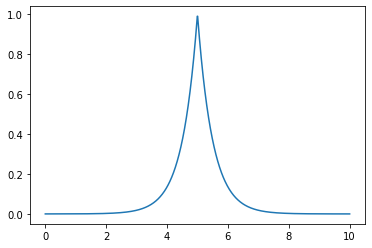

In [17]:
def func_exp(x):
    return np.exp(-2*np.abs(x-5))

XX = np.linspace(0, 10, 1000)

plt.plot(XX, func_exp(XX))

Ajustemos la función por distintas distribuciones: uniforme, gaussiana y gamma.

In [71]:
a, b = 0, 10

def Q_uniform(f, X):
    return f(X)/(1/(b-a))

def Q_normal(f, X):
    return f(X)/st.norm.pdf(x, loc=5, scale=2)

In [72]:
x = np.random.uniform(a, b, 1000000)
fx = Q_uniform(func_exp, x)
np.mean(fx)

0.9994977061663832

In [73]:
fxNormal = Q_normal(func_exp, x)
np.mean(fxNormal)

0.5404342079381445

0.3989422804014327